In [1]:

import pandas as pd
#import numpy as np
#from scipy import stats
import sys
#import datetime
#import time
import matplotlib.pyplot as plt
%matplotlib inline
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
pd.options.display.float_format = '{:,.6f}'.format

#Userdefined module
from fad_v06 import Get_SandD


In [2]:
#############################    SPIKE ANALYSIS   #####################################

No handles with labels found to put in legend.


count
                                                            Value
KPI_name Reason                                                  
y-value  1) above acc-times above regression value              4
         2) above acc-times below regression value              3
         3) Stdj  P1 times Stdj1                                2
         4) Slope increase from leftpoint to validationp...     4
         5) Slope decrease from validationpoint to right...     6
         7) step down of average regression value right ...     3
         8) step up of average regression value right wi...     2
Total                                                          24

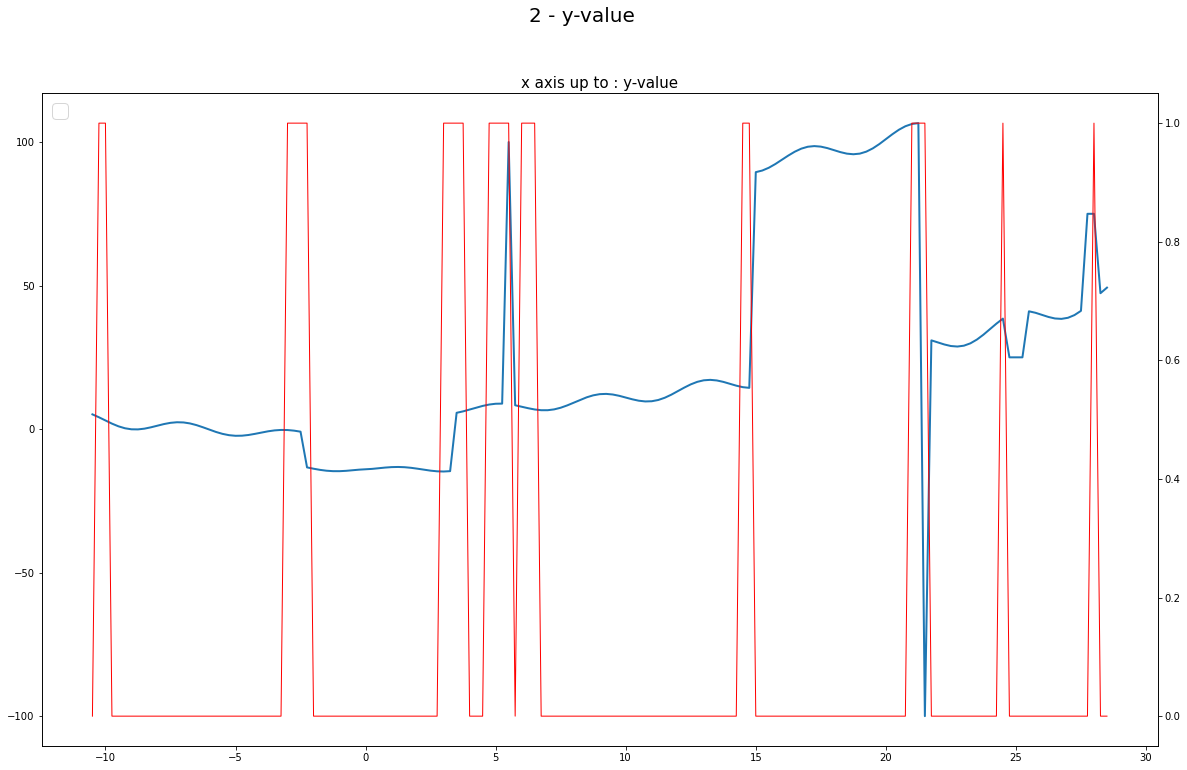

In [3]:
### main ###
pd.options.display.float_format = '{:,.4f}'.format
td0 = pd.read_excel("../FAD/matrix/Testdata_inout3.xlsx",sheet_name="inputdata",usecols="B:C")
#td0 = pd.read_excel(r"./data/Out/spike_ext.xlsx",sheet_name="Sheet1")

dfWT = pd.DataFrame(pd.read_excel("../FAD/matrix/Test_hp.xlsx",usecols="A:J",sheet_name="hp"))

#writer = pd.ExcelWriter("./data/Out/matrix/spike_ext_out.xlsx")
writer = pd.ExcelWriter("../FAD/matrix/Testdata.xlsx")

#td = td0.drop(["Hour"],axis=1)
#td2 = td[-24*12*8:-24*12*5]
td2 = td0
td2.reset_index(inplace=True,drop=True)
td2.to_excel(writer,sheet_name="input")

######################### INITIALIZE DATA   #########################################
kpi_input = td2.columns.to_list()
#P1inc=10
tstart=1
t=tstart
tend = t+1
#accuracy = 20
#window_sizeleft = 2
#window_sizeright= 2
#sd = 50
Time_scale=False
#ignore_startsamples = window_sizeleft + 1
#ignore_endsamples = window_sizeright

##########################  lOOP/CALL MODULE   ###########################################
while t<tend: #len(kpi_input):
    td_in = td2[[kpi_input[0],kpi_input[t]]]
    dfSin_gl, spikelist_gl = Get_SandD(td_in,
                                       acc=dfWT.loc[t-1].iloc[1],
                                       windowsizeleft=dfWT.loc[t-1].iloc[2],
                                       windowsizeright=dfWT.loc[t-1].iloc[3],
                                       sp_name=kpi_input[t],
                                       P1=dfWT.loc[t-1].iloc[4],
                                       sd = dfWT.loc[t-1].iloc[5],
                                       ignorestartsamples = dfWT.loc[t-1].iloc[6],
                                       ignoreendsamples = dfWT.loc[t-1].iloc[7],
                                       absinc = dfWT.loc[t-1].iloc[8],
                                       step = dfWT.loc[t-1].iloc[9],
                                       Timescale=Time_scale
                                       )
    if t == tstart:
        result = dfSin_gl
    else:
        result = pd.concat([result,dfSin_gl])
    if t == tstart:
        resultspike = spikelist_gl
    else:
        resultspike = pd.concat([resultspike,spikelist_gl])
    
    t += 1

# write data to excel
result.to_excel(writer,sheet_name="results")  
resultspike.to_excel(writer,sheet_name="resultsspike") 
writer.save()

# Create Graph:
Title = f"x axis up to : {kpi_input[t-1]}"
SupTitle = f"{t} - {kpi_input[t-1]}"

fig, ax1 = plt.subplots(figsize=(20,12))
ax2 = ax1.twinx()
fig.suptitle(SupTitle, fontsize=20)
plt.title(Title,fontsize=15,loc="center")
ax1.legend(loc="upper left",fontsize=20)
#ax1.plot(dfSin_gl[kpi_input[0]],dfSin_gl[td_in["KPI_name"] == kpi_input[t-1]]["Value"], linewidth=2.0)
ax1.plot(dfSin_gl[kpi_input[0]],dfSin_gl[kpi_input[1]], linewidth=2.0)
#ax.plot(td_in["x-value"],td_in["Regr_value"], linewidth=2.0)
ax2.plot(dfSin_gl[kpi_input[0]],dfSin_gl["spike"], linewidth=1.0,color="red")
#ax.plot(td_in["x-value"],td_in["Diff"], linewidth=2.0)

#ax.plot(td_in["x-value"],td_in["spikevalue"], linewidth=2.0)

#Create spike pivot
pd.options.display.float_format = '{:,.4f}'.format
resultspike_pv = pd.pivot_table(resultspike,values="Value",index=["KPI_name","Reason"]
                                #,columns="DateTime"
                                ,aggfunc=["count"] #"count"]
                                ,fill_value="0"
                                ,margins = True, margins_name='Total'
                               )
resultspike_pv

In [4]:
#resultspike